In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Fair Die.csv")

***QUESTION 1:***

***1. The first statistical analysis you will do is to find the descriptive statistics for each column. You need to find the mean, median, mode, variance, standard deviation, min, max, first quartile, third quartile, and the sample size for each column. There is a video in Canvas that shows you how to do this if you need it. Paste the table with the descriptive statistics below.***

Mean, median, mode, std, min, max, 25%, 75%, count

**Add Mode to description dataframe, Display all required descriptive stats. Some samples have multiple modes**

50% is the median for the output dataframe

In [2]:
dfDescribed = df.describe()

def describeWithMode(df : pd.DataFrame, modeSeries : pd.Series):
    dfModeItterator = pd.DataFrame(modeSeries)
    rows = []

    for _, row in dfModeItterator.iterrows():
        rows.append(row)

    dfMode = pd.DataFrame(rows, index=['mode', 'mode2']) 
    return pd.concat([df, dfMode], ignore_index=False)

def addVariance(df : pd.DataFrame):
    varienceRow = []
    for die in df.columns:
       dfColumnSeries = df[die]
       varienceRow.append(math.pow(dfColumnSeries['std'],2))
    df.loc['variance'] = varienceRow
    return df

describedWithVariance = addVariance(dfDescribed)
fullyDescribedDf = describeWithMode(describedWithVariance, df.mode())
fullyDescribedDf

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3.266667,3.733333,3.433333,3.366667,3.500000,3.500000,2.800000,4.266667,3.733333,3.500000
std,1.112107,1.964045,1.524135,1.691425,1.570197,1.655711,1.540264,1.595972,1.659525,1.717054
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,3.000000,3.500000,3.000000,3.000000,3.500000,4.000000,2.500000,4.500000,4.000000,3.500000
75%,4.000000,6.000000,5.000000,5.000000,5.000000,4.750000,4.000000,6.000000,5.000000,5.000000
max,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
variance,1.236782,3.857471,2.322989,2.860920,2.465517,2.741379,2.372414,2.547126,2.754023,2.948276
mode,3.000000,6.000000,3.000000,2.000000,2.000000,4.000000,2.000000,6.000000,4.000000,5.000000


***QUESTION 2:***

***Remember from Activity 2, the true mean of this scenario is μ=3.5 and the true standard deviation is σ=1.71. Carefully examine the table with the descriptive statistics. Consider the mean and median of each die. Are there any means that seem to be higher or lower than they should be? Is there a difference between the mean and median for any of the samples? Are any of the standard deviations or variances for any of the dice different than they should be? After having carefully considered the data and knowing these parameters, which one of the dice is definitely fair? Paste the descriptive statistics for only that die below.***

**Sus die 1: D1 Variance/standard deviation is very low, and min and max inidcate that the die never rolled a 1 or a 6, mean is low**

**Sus die 2: D2 has a high mean and variance**

**Sus die 3: D4 has a low mean**

**Sus die 4: D7 mean is very low, standard deviation is low, median is low**

**Sus die 5: D8 has a very high mean, median is high**

**Fair die: most likely fair die is D10, has a mean and standard deviation very close to the population**

In [3]:
fullyDescribedDf['D10']

count       30.000000
mean         3.500000
std          1.717054
min          1.000000
25%          2.000000
50%          3.500000
75%          5.000000
max          6.000000
variance     2.948276
mode         5.000000
mode2             NaN
Name: D10, dtype: float64

***QUESTION 3:***

***Next use the descriptive statistics menu to find the boxplots and individual value plots for each of the dice. Compare and contrast the boxplot of D1 to any of the other dice. (You may want to use the die you found in question 2.) What do you see? Compare and contrast the interval value plot of D1 to any of the other dice. What do you see? Paste the boxplot and interval value plot of D1 and the die you chose to compare it to below.***

<Axes: >

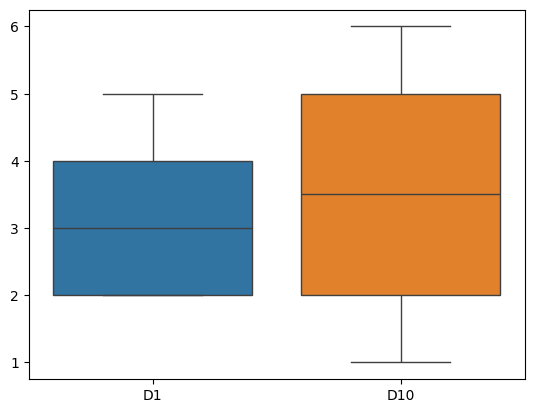

In [6]:
sns.boxplot([df['D1'],df['D10']])


**D1 is not fair because it never rolled a 1 or 6**

***QUESTION 4:***

***4.	Now use the graph builder to create a graph that contains all the boxplots. Paste the graph below.***

<Axes: >

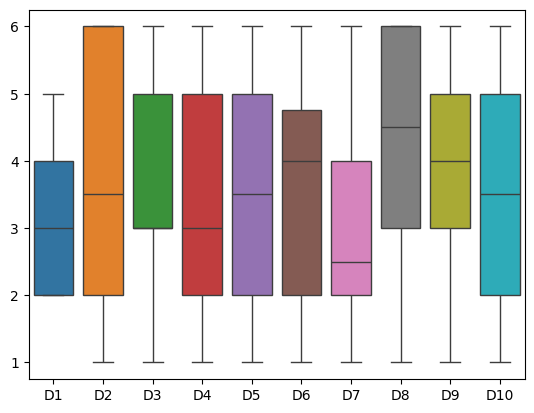

In [7]:
sns.boxplot(df)

**D1, D2, D3, D4, D6, D7, D8, D9 all seem loaded from the boxplots**

***Question 5:***

***5.	Now use Minitab to find the 95% confidence intervals for each of the samples. Paste your output below.***

***Find 95% intervals for each die sample***

In [ ]:
t = 2.045
for column in df.columns:
    n = df[column].size
    std = df[column].std()
    mean = df[column].mean()
    lowerB = mean - t*(std/math.sqrt(n))
    upperB = mean + t*(std/math.sqrt(n))
    print(column + ": (" + str(lowerB) + ", " + str(upperB) + ")")


D1: (2.8514457772918904, 3.681887556041443)
D2: (3.0000293657917276, 4.466637300874939)
D3: (2.864275749669866, 4.0023909169968)
D4: (2.7351489962823274, 3.998184337051006)
D5: (2.9137448012631557, 4.086255198736844)
D6: (2.881816725926018, 4.118183274073981)
D7: (2.2249204752644074, 3.3750795247355923)
D8: (3.6707878636431657, 4.8625454696901675)
D9: (3.1137261193526875, 4.352940547313979)
D10: (2.8589133349780504, 4.14108666502195)


**From this data we can see that D7 and D8 are unfair due to the 95% confidence interval not including the population mean**

***Question 6:***

***6.	Provide a quick summary of the die or dice you found to be unfair and your reasoning for deciding this.***

**Sus die D1 Variance/standard deviation is very low, and min and max inidcate that the die never rolled a 1 or a 6, mean is low**

**Sus die D2 has a high mean and variance**

**Sus die D4 has a low mean**

**Sus die D7 mean is very low, standard deviation is low, median is low. 95% confidence interval does not contain population mean**

**Sus die D8 has a very high mean, median is high. 95% confidence interval does not contain population mean**

**Sus die d9 has a high median and highish mean**

In [ ]:
se = pd.Series([79,64,63,77,71,81,78,58,74,70,60,63])
t= 0
sd = se.std()
n = se.size
lowerBound = se.mean() - t*(sd/math.sqrt(n))
print(se.mean())

69.83333333333333


In [ ]:
x=281
n=2450
p=x/n
# p=.15
z=2.33
marginE=z*math.sqrt((p*(1-p))/n)
# marginE = .03
print("ME: " + str(marginE) + "\nP: "+ str(p)+"\nCI_LB: "+ str(p-marginE)+"\nCI_UB: "+str(p+marginE))


ME: 0.014999947203538226
P: 0.11469387755102041
CI_LB: 0.09969393034748218
CI_UB: 0.12969382475455862
